# DengAI: Predicting Disease Spread
**Can you predict local epidemics of dengue fever?**

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

In recent years dengue fever has been spreading. Historically, the disease has been most prevalent in Southeast Asia and the Pacific islands. These days many of the nearly half billion cases per year are occurring in Latin America.

Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce—can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?

This is an intermediate-level practice competition. Your task is to predict the number of dengue cases each week (in each location) based on environmental variables describing changes in temperature, precipitation, vegetation, and more.

An understanding of the relationship between climate and dengue dynamics can improve research initiatives and resource allocation to help fight life-threatening pandemics.

## Workflow steps
#### 1. Exploratory Data Analysis (EDA)
- Descriptive statistics for the training data
- Distributions for numerical features with histograms
- Distributions for categorical features with barcharts
#### 2. Preprocessing
- Missing values
- Outliers and Noise
- Encoding of categorical variables
- Cardinality for categorical features
#### 3. Feature Engineering and Selection 
- Can we create new features? 
- Which variables can be removed? 
#### 4. Model Building
- Fit the data to different classifiers
- Compare them all with cross-validation 
- See if we can improve the model by tuning the parameters
#### 5. Create Predictions
<br>
<br>

## 1. Exploratory Data Analysis (EDA)

The data at hand represents information about respondents in a survey that were asked questions about their backgrounds, opinions, and health behaviors.
With the help of this data we want to predict whether an individual has received the H1N1 vaccine and seasonal flu vaccine. 
<br>
<br>
We will train the model with the training features (X_train) and training labels (y_train) and give it some new data it hasn't seen before (X_test) to evaluate how well it classifies the new data. 
<br> 
<br>
As you can see below there's 26707 observations in the training set and 26708 in the test set. <br>
This is somewhat uncommon, since the training/test split is usually 80%/20% for train and test respectively, or 70/30. <br> However it won't affect our workflow. <br>
<br>
There are numerical and categorical variables in data. In the following we will have a closer look at those variables and: 
- look at descriptive statistics and distributions for the numerical variables
- look at descriptive statistics and distributions for the categorical variables
- look at the cardinality, i.e. the number of unique labels, for the categorical variables (at first glance it seems there are some labels that don't really make sense)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) # show all columns
pd.set_option('display.max_rows', None) # show all rows
import numpy as np
from scipy import stats

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import missingno as msno

## ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import cross_val_score

# Turning off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data

## Train data
X_train = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/DengAI-Predicting-Disease-Spread/main/dengue_features_train.csv', index_col=['city','year','weekofyear'])
y_train = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/DengAI-Predicting-Disease-Spread/main/dengue_labels_train.csv', index_col=['city','year','weekofyear'])

## Test data for later on 
test_features = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/DengAI-Predicting-Disease-Spread/main/dengue_features_test.csv', index_col=['city','year','weekofyear'])

## Submission format
submission_format = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/DengAI-Predicting-Disease-Spread/main/submission_format.csv')

In [4]:
print(X_train.shape, 
y_train.shape)

(1456, 21) (1456, 1)


In [5]:
X_train.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   1990 18                              299.8                      295.9   
          19                              300.9                      296.4   
          20                              300.5                      297.3   
          21                              301.4                      297.0   
          22                              301.9                      297.5   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           2

In [6]:
y_train.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

In [7]:
# Add labels to training dataframe
train_df = pd.concat([X_train, y_train], axis=1)

# Remove week_start_date, as per instructions on the website
train_df = train_df.drop('week_start_date', axis=1)

# Split by city, as per instructions on the website
train_sj = train_df.loc['sj']
train_iq = train_df.loc['iq']

# Print dimensions of both dfs 
print('Shape San Jose: ', train_sj.shape)
print('\nShape Iquitos: ', train_iq.shape)

Shape San Jose:  (936, 21)

Shape Iquitos:  (520, 21)


## 1 Exploratory Data Analysis

In [8]:
# numerical features for San Jose

train_sj.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,936.000000
mean,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,301.398817,297.301828,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484,34.180556
std,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,1.258927,1.294705,35.628055,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811,51.381372
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,292.600000,0.000000,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,300.400000,296.300000,10.825000,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000,9.000000
50%,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,301.500000,297.500000,21.300000,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000,19.000000
75%,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,302.400000,298.400000,37.000000,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000,37.000000
max,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,304.300000,299.900000,570.500000,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000,461.000000


In [9]:
# numerical features for Iquitos

train_iq.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,517.000000,517.000000,517.000000,517.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,483.000000,483.000000,506.000000,512.000000,504.000000,520.000000
mean,0.263869,0.238783,0.250126,0.266779,64.245736,297.869538,299.133043,295.492982,307.082752,292.866667,57.609864,88.639117,64.245736,17.096110,9.206783,27.530933,10.566197,34.004545,21.196680,62.467262,7.565385
std,0.081370,0.076751,0.077354,0.086345,35.218995,1.170997,1.332073,1.417229,2.382980,1.663069,50.286555,7.583889,35.218995,1.445769,2.448525,0.921769,1.535496,1.325261,1.260327,63.245958,10.765478
min,0.061729,0.035860,0.029880,0.064183,0.000000,294.635714,294.892857,290.088571,300.000000,286.900000,0.000000,57.787143,0.000000,12.111429,3.714286,21.400000,5.200000,30.100000,14.700000,0.000000,0.000000
25%,0.200000,0.179540,0.194743,0.204129,39.105000,297.092500,298.221429,294.593929,305.200000,291.975000,24.065000,84.295000,39.105000,16.102857,7.371429,27.000000,9.500000,33.200000,20.600000,17.200000,1.000000
50%,0.263643,0.232971,0.249800,0.262143,60.470000,297.822857,299.121429,295.852143,307.050000,293.050000,46.440000,90.917143,60.470000,17.428571,8.964286,27.600000,10.625000,34.000000,21.300000,45.300000,5.000000
75%,0.319971,0.293929,0.302300,0.325150,85.757500,298.649286,300.123214,296.548571,308.700000,294.200000,71.072500,94.563929,85.757500,18.180357,11.014286,28.100000,11.655000,34.900000,22.000000,85.950000,9.000000
max,0.508357,0.454429,0.538314,0.546017,210.830000,301.637143,302.928571,298.450000,314.000000,296.000000,362.030000,98.610000,210.830000,20.461429,16.028571,30.800000,15.800000,42.200000,24.200000,543.300000,116.000000


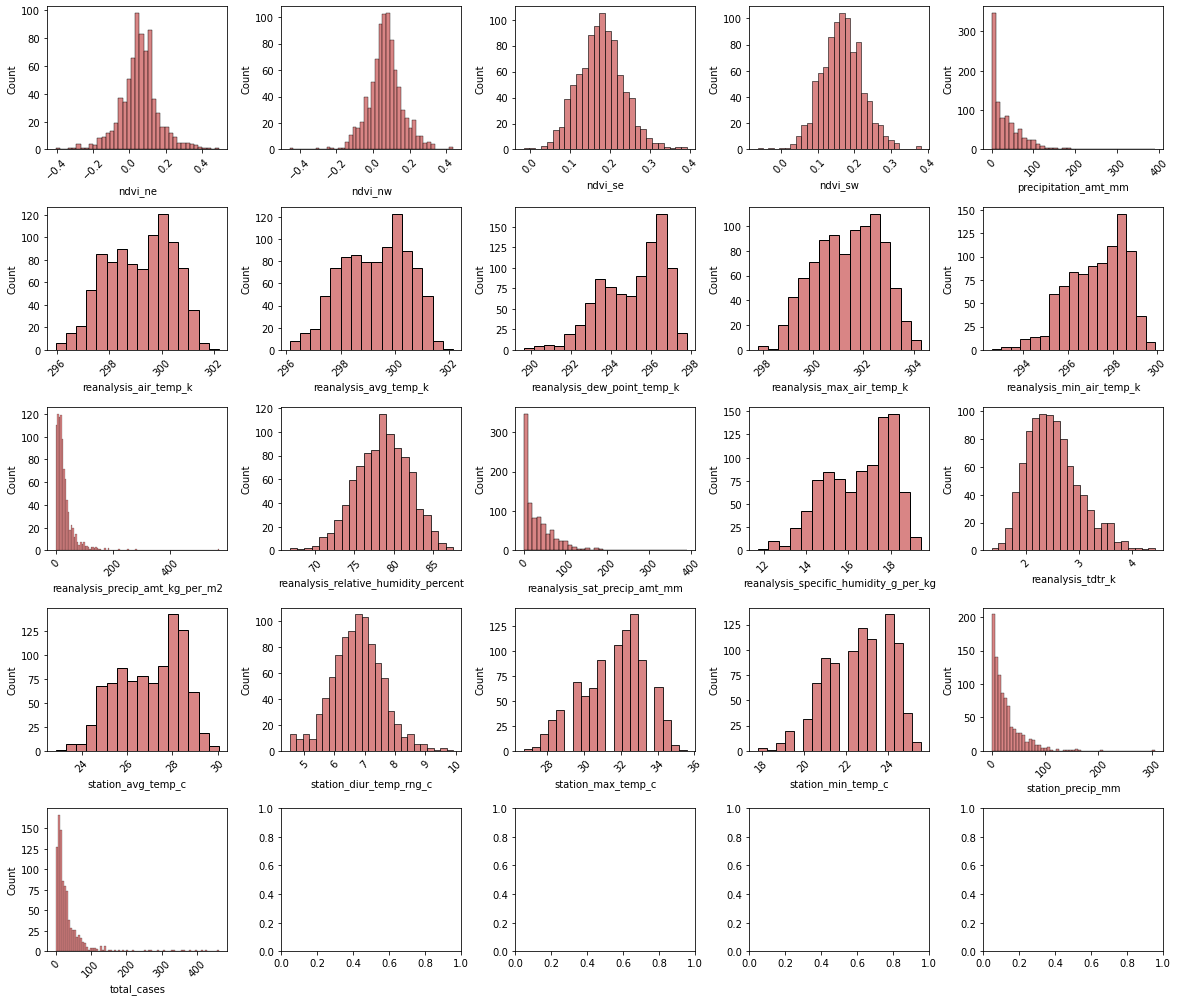

In [10]:
# visualization numerical features for San Jose

fig, ax = plt.subplots(5, 5, figsize=(20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(train_sj.columns, ax.flatten()):
    sns.histplot(train_sj[variable], ax=subplot, color='indianred')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)      

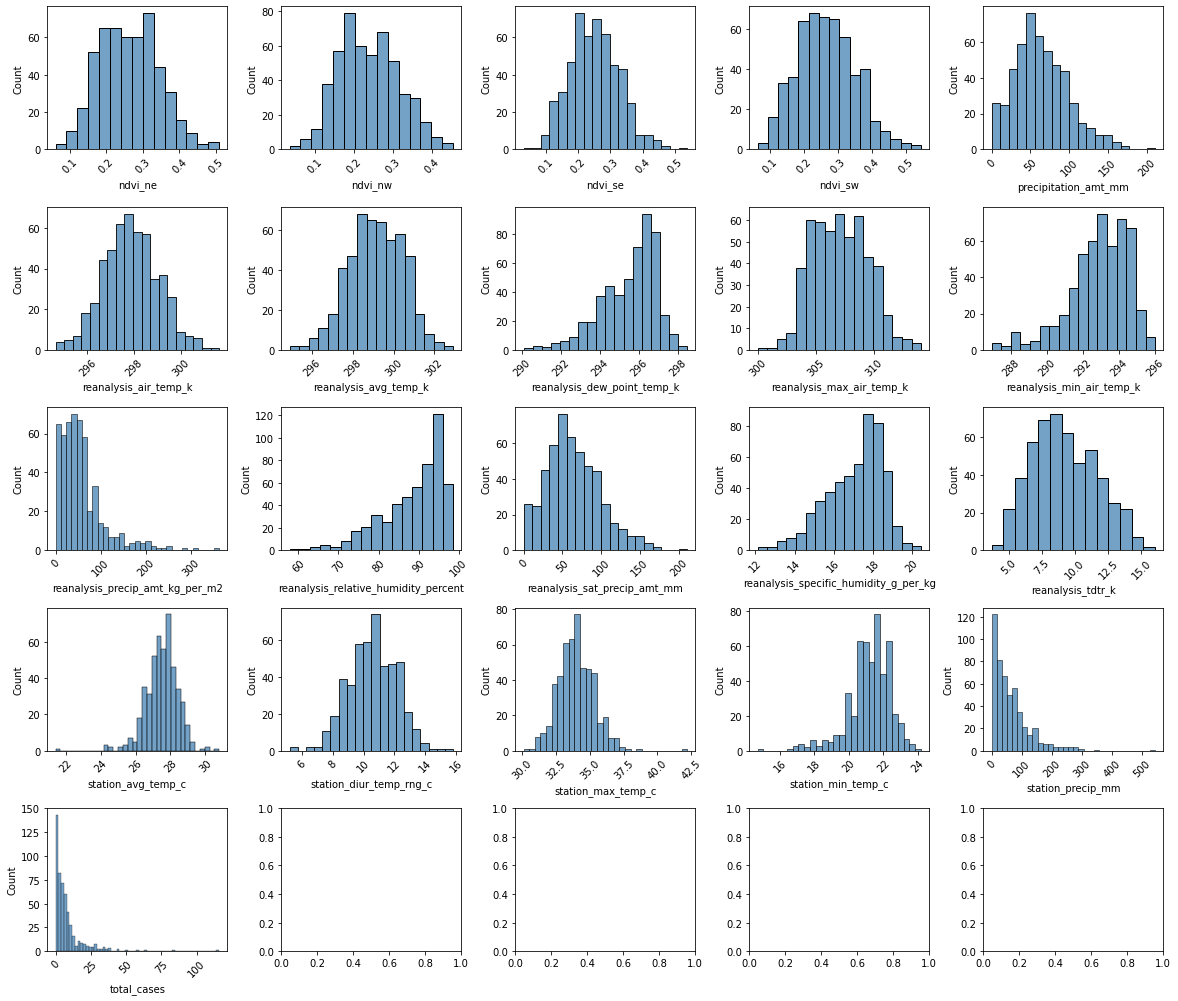

In [11]:
# visualization numerical features for Iquitos

fig, ax = plt.subplots(5, 5, figsize=(20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(train_iq.columns, ax.flatten()):
    sns.histplot(train_iq[variable], ax=subplot, color='steelblue')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)      

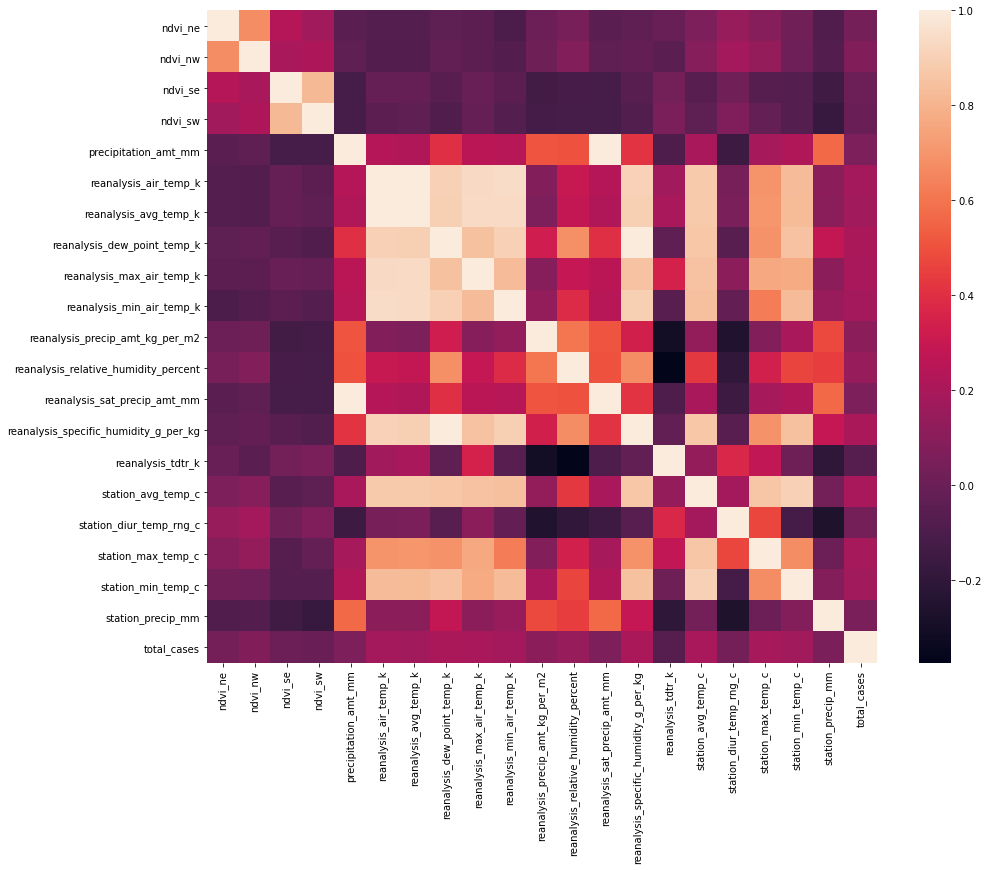

In [12]:
# Correlations between features and target variable for San Jose

plt.figure(figsize=(15,12))
cor_sj = train_sj.corr()
sns.heatmap(cor_sj, annot=False)
plt.show()

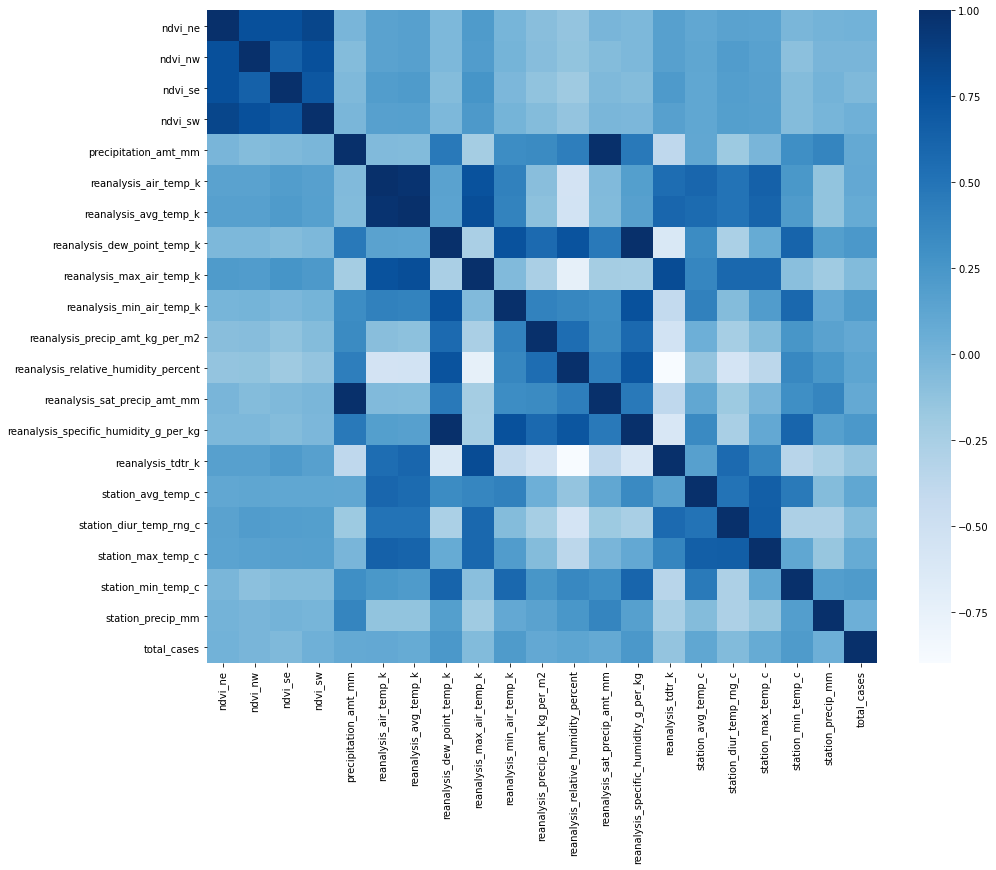

In [13]:
# Correlations between features and target variable for Iquitos 

plt.figure(figsize=(15,12))
cor_iq = train_iq.corr()
sns.heatmap(cor_iq, annot=False, cmap='Blues')
plt.show()

#### Initial Observations

From the above exploratory analysis we can conclude a few things: 
- The distributions seem fairly normal with some of them having a light skew to the right
- None of the features in the dataset are strongly correlated with the target variable
- The vegetation indices seem to have a strong correlation with each other, but surprisingly low correlations with the rest of the features
- Some of the temperatures/weather variables have strong correlation with each other, which might make some of them redundant



## 2 Preprocessing

In the following we will focus on preprocessing the data: 
- Look if there are **missing values**, and, if yes, impute them 
- Look if there are **outliers** or noise

### 2.1 Missing values
Below we can see that there isn't an overly high proportion of missing values. <br>
We can therefore impute the missing values without any issues. 

,variable,Unique values,Nan %,zeros %
0,ndvi_ne,1215,13.3,0.0
1,ndvi_nw,1366,3.6,0.0
16,station_diur_temp_rng_c,471,3.0,0.0
15,station_avg_temp_c,493,3.0,0.0
2,ndvi_se,1396,1.5,0.0
3,ndvi_sw,1389,1.5,0.0
19,station_precip_mm,664,1.5,2.9
17,station_max_temp_c,74,1.4,0.0
18,station_min_temp_c,74,1.0,0.0
4,precipitation_amt_mm,1158,0.9,16.4


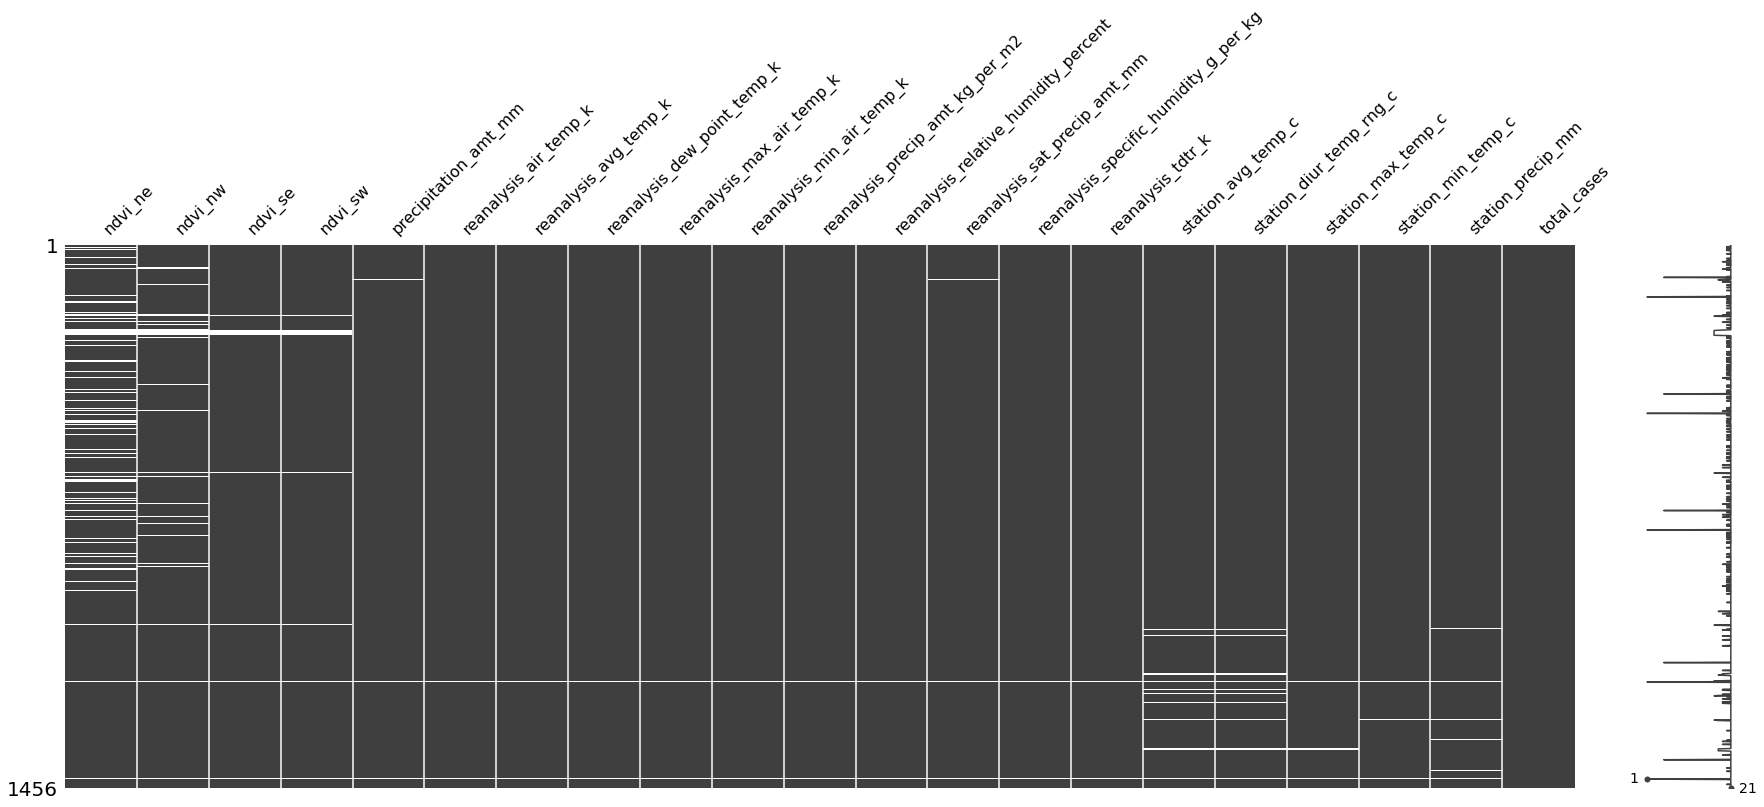

In [14]:
# Plot missing values for the whole dataset 

msno.matrix(train_df, figsize = (30,10))

def missing_values(data):
    df = pd.DataFrame()
    for col in list(data):
        unique_values = data[col].unique()
        try:
            unique_values = np.sort(unique_values)
        except:
            pass
        nans = round(pd.isna(data[col]).sum()/data.shape[0]*100, 1)
        zeros = round((data[col] == 0).sum()/data.shape[0]*100, 1)
        #empty = round((data[data[col]] == '').sum()/data.shape[0]*100, 1)
        df = df.append(pd.DataFrame([col,
                                     len(unique_values),
                                     nans,
                                     zeros,
                                     #empty
                                    ]).T, ignore_index = True)

    return df.rename(columns = {0: 'variable',
                                1: 'Unique values',
                                2: 'Nan %',
                                3: 'zeros %',
                                #4: 'empty'
                               }).sort_values('Nan %', ascending=False)

missing_values(train_df)

In [15]:
# Missing values imputation

# San Juan Data
for col in train_sj.columns:
    train_sj.fillna(train_sj[col].mean(), inplace=True) 

# Iquitos Data
for col in train_iq.columns:
    train_iq.fillna(train_iq[col].mean(), inplace=True) 

### 2.2 Feature Selection 

We've already looked at the correlations between the variables. The vegetation index variables seemed to have a high correlation with each other and some climate variables also seemed to have a high correlation with each other, which might be an indicator of redundancy. 
None of the variables seemed to have a particularly high correlation with our target variable. 

In the following we'll have a look at what variables might be removed from our dataset.


In [16]:
# Looking at amount of variation - those with 0 variance will be eliminiated

## San Juan
print('Variation San Juan Data\n\n',
train_sj.var(axis=0, ddof=1).sort_values(ascending=True))

## Iquitos
print('\n\nVariation Iquitos Data\n\n',
train_iq.var(axis=0, ddof=1).sort_values(ascending=True))

## Removing variables with low variance for each dataset 
train_sj.drop(columns=['ndvi_sw', 'ndvi_se', 'ndvi_nw', 'ndvi_ne'], axis=1, inplace=True)
train_iq.drop(columns=['ndvi_sw', 'ndvi_se', 'ndvi_nw', 'ndvi_ne'], axis=1, inplace=True)

Variation San Juan Data

 ndvi_sw                                     0.003313
ndvi_se                                     0.003487
ndvi_nw                                     0.008109
ndvi_ne                                     0.009136
reanalysis_tdtr_k                           0.285829
station_diur_temp_rng_c                     0.980569
reanalysis_specific_humidity_g_per_kg       4.155545
station_min_temp_c                          5.494417
station_avg_temp_c                          6.621116
station_max_temp_c                          9.276859
reanalysis_relative_humidity_percent       50.715535
reanalysis_dew_point_temp_k               557.512407
reanalysis_min_air_temp_k                 565.008178
reanalysis_air_temp_k                     571.940859
reanalysis_avg_temp_k                     572.329563
reanalysis_max_air_temp_k                 580.553816
station_precip_mm                         859.039201
reanalysis_precip_amt_kg_per_m2          1267.108015
precipitation_amt_mm

<AxesSubplot:>

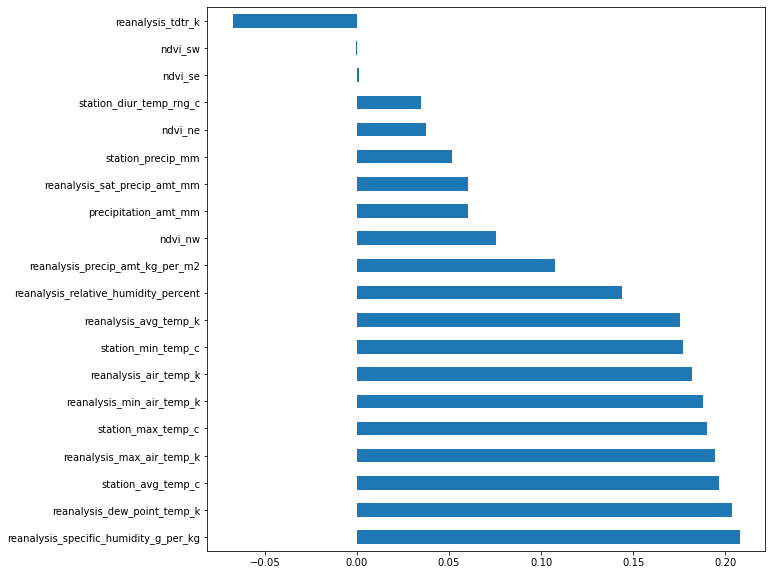

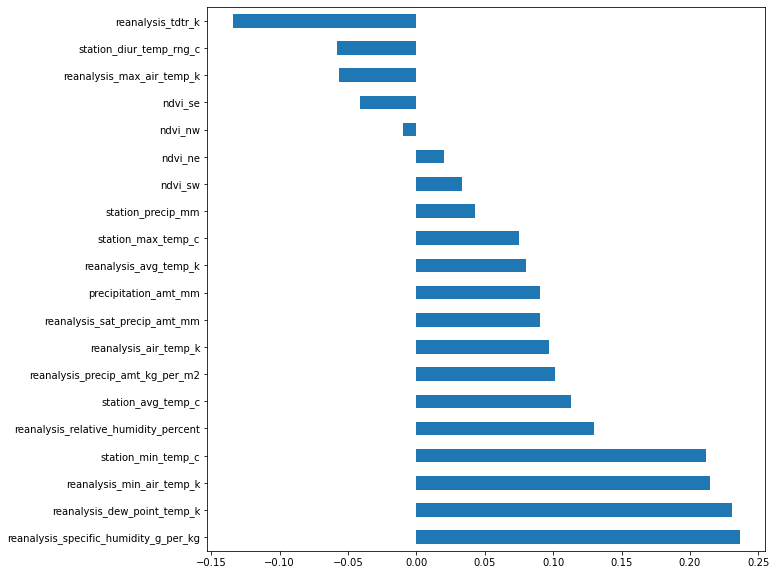

In [21]:
# Correlations with target variable

## San Juan Data
plt.figure(figsize=(10,10))
(cor_sj.total_cases
    .drop('total_cases') # don't compare with myself
    .sort_values(ascending=False)
    .plot
    .barh())


## Iquitos Data
plt.figure(figsize=(10,10))
(cor_iq.total_cases
    .drop('total_cases') # don't compare with myself
    .sort_values(ascending=False)
    .plot
    .barh())

In [18]:
# Select features with high correlation with target variable 

selected_features = ['reanalysis_tdtr_k',
                    'reanalysis_specific_humidity_g_per_kg',
                    'reanalysis_min_air_temp_k',
                    'reanalysis_dew_point_temp_k',
                    'reanalysis_precip_amt_kg_per_m2',
                    'total_cases']

## Select feature for both datasets
train_sj_reduced = train_sj[selected_features]
train_iq_reduced = train_iq[selected_features]

## Check shape of both dataframes
print(train_sj_reduced.shape,
      train_iq_reduced.shape)

(936, 6) (520, 6)


In [19]:
train_sj_reduced.head()

reanalysis_tdtr_k  reanalysis_specific_humidity_g_per_kg  \
year weekofyear                                                             
1990 18                   2.628571                              14.012857   
     19                   2.371429                              15.372857   
     20                   2.300000                              16.848571   
     21                   2.428571                              16.672857   
     22                   3.014286                              17.210000   

                 reanalysis_min_air_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                           
1990 18                              295.9                   292.414286   
     19                              296.4                   293.951429   
     20                              297.3                   295.434286   
     21                              297.0                   295.310000   
     22                              297.5                   295.821429   

                 reanalysis_precip_amt_kg_per_m2  total_cases  
year weekofyear                                                
1990 18                                    32.00            4  
     19                                    17.94            5  
     20                                    26.10            4  
     21                                    13.90            3  
     22                                    12.20            6

## 5 Model Building
In the following we will create different models and compare them on the basis of the mean squared error (MSE) using cross validation. <br>
Then for the best models, we will perform a gridsearch to further improve the performance of the models by tuning the hyperparameters. 

We will look at the data seperately, i.e. first we'll create predictions for the San Juan data and then for the Iquitos data.

But first we have to **split our data into training and test set**.

In [22]:
# For San Juan data

X_sj = train_sj_reduced.drop('total_cases', axis=1)
y_sj = train_sj_reduced['total_cases']

X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(
                        X_sj,
                        y_sj,
                        test_size=0.2, 
                        random_state=42)

# For Iquitos data 

X_iq = train_iq_reduced.drop('total_cases', axis=1)
y_iq = train_iq_reduced['total_cases']

X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(
                        X_iq,
                        y_iq,
                        test_size=0.2, 
                        random_state=42)

In [23]:
# Scale data for both datasets
from sklearn.preprocessing import StandardScaler

## San Juan 
X_train_sj = pd.DataFrame(StandardScaler().fit_transform(X_train_sj), columns = X_train_sj.columns)
X_test_sj = pd.DataFrame(StandardScaler().fit_transform(X_test_sj), columns = X_test_sj.columns)

## Iquitos
X_train_iq = pd.DataFrame(StandardScaler().fit_transform(X_train_iq), columns = X_train_iq.columns)
X_test_iq = pd.DataFrame(StandardScaler().fit_transform(X_test_iq), columns = X_test_iq.columns)


### 5.1 Predictions for San Juan data

In [24]:
# Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mae

## Create model
lr = LinearRegression()
lr.fit(X_train_sj, y_train_sj)

## CV Score
y_sj_lr = cross_val_score(lr, X_sj, y_sj, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_sj_lr.mean()*-1)



Cross-validated MAE: 
28.468208029885112


In [25]:
# Support Vector Regression 

from sklearn.svm import SVR

## Create model
svr = SVR()
svr.fit(X_train_sj, y_train_sj)

## CV Score
y_sj_svr = cross_val_score(svr, X_sj, y_sj, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_sj_svr.mean()*-1)

Cross-validated MAE: 
25.087003243704395


In [26]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

## Create model
rf = RandomForestRegressor()
rf.fit(X_train_sj, y_train_sj)

## CV Score
y_sj_rf = cross_val_score(rf, X_sj, y_sj, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_sj_rf.mean()*-1)

Cross-validated MAE: 
32.425080411957296


In [27]:
# RNN with LSTM 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 5.2 Predictions for Iquitos data

In [28]:
# Linear Regression 

## Create model
lr = LinearRegression()
lr.fit(X_train_iq, y_train_iq)

## CV Score
y_iq_lr = cross_val_score(lr, X_iq, y_iq, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_iq_lr.mean()*-1)



Cross-validated MAE: 
6.692233770326195


In [29]:
# Support Vector Regression 

## Create model
svr = SVR()
svr.fit(X_train_iq, y_train_iq)

## CV Score
y_iq_svr = cross_val_score(svr, X_iq, y_iq, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_iq_svr.mean()*-1)

Cross-validated MAE: 
6.209075403953483


In [30]:
# Random Forest Regressor

## Create model
rf = RandomForestRegressor()
rf.fit(X_train_iq, y_train_iq)

## CV Score
y_iq_rf = cross_val_score(rf, X_iq, y_iq, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_iq_rf.mean()*-1)

Cross-validated MAE: 
7.427531356837607


### 5.3 Predictions for entire dataset

In [31]:
# Preprocess entire data 
preprocessing(train_df)


#  Split entire data 

X = train_df.drop('total_cases', axis=1)
y = train_df['total_cases']

X_train, X_test, y_train, y_test = train_test_split(
                        X,
                        y,
                        test_size=0.2, 
                        random_state=42)


NameError: name 'preprocessing' is not defined

In [ ]:
# Linear Regression 

## Create model
lr = LinearRegression()
lr.fit(X_train, y_train)

## CV Score
y_lr = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_lr.mean()*-1)



In [ ]:
# Support Vector Regression 

## Create model
svr = SVR()
svr.fit(X_train, y_train)

## CV Score
y_svr = cross_val_score(svr, X, y, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_svr.mean()*-1)

# print prediction results 
predictions = svr.predict(X_test) 

# Loss for test
print(f'Cross-validated MAE: {mae(y_test, predictions)}')


In [32]:
# Random Forest Regressor

## Create model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

## CV Score
y_rf = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error')


##################
## Print results
##################

## CV Accuracy
print('Cross-validated MAE: '); print("="*len("Cross-validated MAE:")); print(y_rf.mean()*-1)

ValueError: could not convert string to float: '1990-04-30'

### 5.4 Hyperparameter Tuning for best model

In [34]:
# Hyperparameter Tuning for SVR 

from sklearn.model_selection import RandomizedSearchCV

## Create the parameter grid based on the results of random search 
grid = {
    'C': [0.1, 0.2, 0.4, 0.8, 1],
    'epsilon': [0.1, 0.2, 0.3]
}
## Create a base model
svr = SVR()
## Instantiate grid search model
svr_randomsearch = RandomizedSearchCV(estimator = svr, param_distributions = grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [50]:
X_train.head()

,,,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,year,weekofyear,,,,,,,,,,,,,,,,,,,,
sj,1995,11,0.073900,0.115067,0.145200,0.154743,19.43,297.110000,297.085714,292.821429,299.6,294.6,18.60,77.020000,19.43,14.304286,2.057143,25.257143,6.757143,31.7,21.1,16.5
iq,2002,50,0.268029,0.142429,0.288671,0.185071,35.02,297.884286,298.950000,296.390000,307.4,294.2,30.89,92.614286,35.02,18.004286,7.928571,27.650000,9.450000,34.0,22.9,57.2
sj,2002,30,-0.070450,-0.021333,0.219286,0.224543,1.07,300.547143,300.678571,295.912857,302.5,298.8,7.09,75.867143,1.07,17.260000,2.614286,28.228571,6.900000,32.8,23.3,16.3
iq,2007,16,0.143086,0.207157,0.168457,0.274314,93.62,297.031429,298.092857,296.014286,304.8,292.0,46.45,94.721429,93.62,17.551429,7.528571,27.400000,9.500000,33.5,22.1,97.1
sj,2000,11,0.231100,0.230875,0.159100,0.087300,25.96,296.315714,296.450000,290.998571,298.4,294.0,3.29,72.142857,25.96,12.738571,2.357143,25.071429,5.557143,28.9,21.1,0.8


In [35]:
# Fit the grid search to the data
svr_randomsearch.fit(X_train, y_train) 
svr_randomsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'epsilon': 0.3, 'C': 1}

In [57]:
from sklearn.metrics import mean_absolute_error as mae

# print prediction results 
predictions = svr_randomsearch.predict(X_test) 

# Loss for test
print(f'Cross-validated MAE: {mae(y_test, predictions)}')


Cross-validated MAE: 25.497234177581742


## 6 Create submission file

In [33]:
test_features.head()

week_start_date  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                          
sj   2008 18              2008-04-29  -0.0189 -0.018900  0.102729  0.091200   
          19              2008-05-06  -0.0180 -0.012400  0.082043  0.072314   
          20              2008-05-13  -0.0015       NaN  0.151083  0.091529   
          21              2008-05-20      NaN -0.019867  0.124329  0.125686   
          22              2008-05-27   0.0568  0.039833  0.062267  0.075914   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   2008 18                         78.60             298.492857   
          19                         12.56             298.475714   
          20                          3.66             299.455714   
          21                          0.00             299.690000   
          22                          0.76             299.780000   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   2008 18                     298.550000                   294.527143   
          19                     298.557143                   294.395714   
          20                     299.357143                   295.308571   
          21                     299.728571                   294.402857   
          22                     299.671429                   294.760000   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   2008 18                              301.1                      296.4   
          19                              300.8                      296.7   
          20                              302.2                      296.4   
          21                              303.0                      296.9   
          22                              302.3                      297.3   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   2008 18                                    25.37   
          19                                    21.83   
          20                                     4.12   
          21                                     2.20   
          22                                     4.36   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   2008 18                                     78.781429   
          19                                     78.230000   
          20                                     78.270000   
          21                                     73.015714   
          22                                     74.084286   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   2008 18                                 78.60   
          19                                 12.56   
          20                                  3.66   
          21                                  0.00   
          22                                  0.76   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   2008 18                                      15.918571   
          19                                      15.791429   
          20                                      16.674286   
          21                                      15.775714   
          22                                      16.137143   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   2008 18                   3.128571           26.528571   
          19                   2.571429           26.07142

In [46]:
# Preprocess test_features

## Remove week_start_date
test_features.drop('week_start_date', axis=1, inplace=True)

## Impute missing values
for col in test_features.columns:
    test_features.fillna(test_features[col].mean(), inplace=True) 
    
## Use only selected features
test_features = test_features[['reanalysis_tdtr_k',
                   'reanalysis_specific_humidity_g_per_kg',
                   'reanalysis_min_air_temp_k',
                   'reanalysis_dew_point_temp_k',
                   'reanalysis_precip_amt_kg_per_m2']]   

## Split into San Juan and Iquitos data 

test_sj = test_features.loc['sj']
test_iq = test_features.loc['iq']

KeyError: "['week_start_date'] not found in axis"

In [48]:
# Create predictions for each city

submission_sj = svr.predict(test_sj) 
submission_iq = svr.predict(test_iq)

In [ ]:
# use test_values_clean to create the submission file
predictions_submission = rf_gridsearch.predict(test_values_clean)

submission = pd.DataFrame()
submission['id'] = test_values_clean.index.values
submission['status_group'] = predictions_submission
# replace int with string labels
replacements = {
   'status_group': {
      0: 'non functional',
      1: 'functional needs repair',
      2: 'functional'}
}

submission.replace(replacements, inplace=True)

submission.head()

In [62]:
# Concatenate both dataframes

submission_final = np.concatenate([submission_sj, submission_iq])

# Create submission dataframe
submission_df = pd.DataFrame
submission_df = test_features.reset_index()
submission_df = submission_df[['city', 'year', 'weekofyear']]

# Add predictions to dataframe 
submission_df['total_cases'] = submission_final

# Convert to int
submission_df['total_cases'] = submission_df['total_cases'].astype(int)

In [63]:
# Save as csv file
submission_df.to_csv('submission_DengAI.csv', index=False)